This is a test

In [96]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [97]:
df = pd.read_csv('osteoporosis.csv')
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [98]:
df.describe()

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [100]:
df.isna().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [101]:
listDummies= df.select_dtypes(include='object').columns.to_list()

In [102]:
#onehot encoding
oneHot = pd.get_dummies(df[listDummies], drop_first=True)
df = df.drop(listDummies, axis=1)
df = pd.concat([df, oneHot], axis=1)
df.head()

,Id,Age,Osteoporosis,Gender_Male,Hormonal Changes_Postmenopausal,Family History_Yes,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Body Weight_Underweight,Calcium Intake_Low,Vitamin D Intake_Sufficient,Physical Activity_Sedentary,Smoking_Yes,Alcohol Consumption_None,Medical Conditions_None,Medical Conditions_Rheumatoid Arthritis,Medications_None,Prior Fractures_Yes
0,104866,69,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1
1,101999,32,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,1
2,106567,89,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
3,102316,78,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0
4,101944,38,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1,1


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import recall_score

In [104]:
Y = df['Osteoporosis']

# Definir as variáveis de entrada (features)
X = df.drop(['Osteoporosis'], axis=1)



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)


#model = RandomForestClassifier(random_state=15, max_depth= 4)
#model.fit(X_train, Y_train)

from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, Y_train)





RandomForestClassifier(max_depth=4, random_state=15)

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       313
           1       0.98      0.72      0.83       275

    accuracy                           0.86       588
   macro avg       0.89      0.85      0.86       588
weighted avg       0.89      0.86      0.86       588


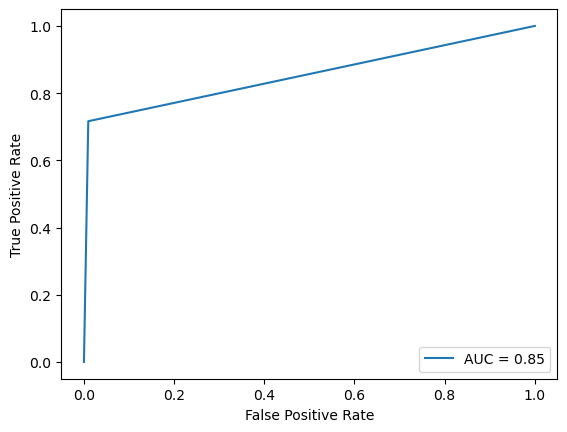

In [105]:
pred_class = model.predict(X_test)
print(classification_report(Y_test, pred_class))


recall_score(Y_test, pred_class)
recall_score(Y_test, pred_class, pos_label=0)
confusion_matrix(Y_test, pred_class)
roc_auc = roc_auc_score(Y_test, pred_class)
roc_auc
fpr, tpr, thresholds = roc_curve(Y_test, pred_class)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [106]:
from sklearn.metrics import accuracy_score
import plotly.express as px
predict_proba = model.predict_proba(X_test)[:, 1]
acc_atual = 0
thr_otimo = 0
for thr in np.arange(0, 1, .1):
    acc = accuracy_score(Y_test, predict_proba >= thr)
    if acc >= acc_atual:
        thr_otimo = thr
        acc_atual = acc
acc_atual

0.8690476190476191

In [107]:
thr_otimo

0.4

In [108]:
acc_lista = []
for thr in np.arange(0, 1, .1):
    acc_lista.append(accuracy_score(Y_test, predict_proba >= thr))

px.line(x=np.arange(0, 1, .1), y=acc_lista)
print(classification_report(Y_test, predict_proba >= .4))
print(classification_report(Y_test, predict_proba >= .8))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       313
           1       0.94      0.77      0.85       275

    accuracy                           0.87       588
   macro avg       0.88      0.86      0.87       588
weighted avg       0.88      0.87      0.87       588

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       313
           1       1.00      0.68      0.81       275

    accuracy                           0.85       588
   macro avg       0.89      0.84      0.84       588
weighted avg       0.88      0.85      0.84       588


In [109]:

df = pd.DataFrame(model.feature_importances_.T, index=X.columns, columns=['Importancia'])
df.sort_values('Importancia', ascending=False)
px.bar(df.sort_values('Importancia'))